# **Hierarchal Clustering**

## Import & Data

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv("Car_details.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6750.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5550.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2370.0,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3375.0,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1950.0,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


---
## Veriyi Düzenlemek

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   float64
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.6+ KB


In [176]:
print(df.isna().sum().sum())
df.isna().sum()

1100


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [177]:
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [178]:
df[["engine","cc"]] = df["engine"].str.split(" ",n=1, expand=True)

In [179]:
df.drop("cc", axis=1, inplace=True)

In [180]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6750.0,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5550.0,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [181]:
df[["max_power","hp"]] = df["max_power"].str.split(" ",n=1, expand=True)
df.drop("hp", axis=1, inplace=True)
df.iloc[54:56]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
56,Toyota Innova 2.5 G (Diesel) 7 Seater,2016,14250.0,99000,Diesel,Dealer,Manual,First Owner,12.99 kmpl,2494,100.6,200Nm@ 1200-3600rpm,7.0
57,Audi A6 2.0 TDI Technology,2013,26250.0,33900,Diesel,Dealer,Automatic,Second Owner,17.68 kmpl,1968,174.33,380Nm@ 1750-2500rpm,5.0


In [182]:
df[["mileage","km"]] = df["mileage"].str.split(" ",n=1, expand=True)
df.drop("km", axis=1, inplace=True)
df.iloc[5254:5256]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5403,Hyundai Verna SX,2012,5325.0,60000,Petrol,Dealer,Manual,First Owner,17.7,1497,113.42,144.15nm@ 4500rpm,5.0
5404,Hyundai i10 Magna,2010,3375.0,50000,Petrol,Dealer,Manual,First Owner,20.36,1197,78.9,111.7Nm@ 4000rpm,5.0


In [183]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,6750.0,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,5550.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,2370.0,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,3375.0,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,1950.0,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [184]:
df.drop("torque", axis=1, inplace=True)

In [185]:
df.iloc[756:759]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
783,Mahindra Bolero SLX 2WD BSIII,2009,4350.0,120000,Diesel,Individual,Manual,First Owner,13.6,2523,63,7.0
784,Mahindra Scorpio 2.6 SPORTZ CRDe,2006,3300.0,120000,Diesel,Individual,Manual,Second Owner,10.5,2179,120,8.0
785,Hyundai Santro Xing GL,2009,1800.0,90000,Petrol,Individual,Manual,Second Owner,0.0,1086,62,5.0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   float64
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  seats          7906 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 803.0+ KB


In [187]:
df = df.astype({
    'mileage': 'float64',
    'engine': 'float64',
    'max_power': 'float64'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   float64
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 803.0+ KB


In [188]:
# df['mileage'] = df['mileage'].astype(float)
# df["engine"] = df["engine"].astype(float)
# df["max_power"] = df["max_power"].astype(float)
# df.info()
# Böyle de mübahtır

In [189]:
df.duplicated().sum()

1189

In [190]:
df.drop_duplicates(inplace=True)

In [191]:
df.duplicated().sum()

0

* Veriyi incelemek ve modellemek için en ideal hale getirdik.

---
## EDA

In [192]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,7895.789955,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,7853.256724,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,449.985000,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,3750.000000,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,6300.000000,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,9750.000000,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,150000.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [193]:
df["seats"].value_counts()

5.0     5254
7.0      966
8.0      221
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [194]:
pd.concat({"Eşsiz Değer" : df.apply(pd.unique), "Sayısı": df.nunique()}, axis=1)

,Eşsiz Değer,Sayısı
name,"[Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI A...",1982
year,"[2014, 2006, 2010, 2007, 2017, 2001, 2011, 201...",27
selling_price,"[6750.0, 5550.0, 2370.0, 3375.0, 1950.0, 6600....",670
km_driven,"[145500, 120000, 140000, 127000, 45000, 175000...",898
fuel,"[Diesel, Petrol, LPG, CNG]",4
seller_type,"[Individual, Dealer, Trustmark Dealer]",3
transmission,"[Manual, Automatic]",2
owner,"[First Owner, Second Owner, Third Owner, Fourt...",5
mileage,"[23.4, 21.14, 17.7, 23.0, 16.1, 20.14, 17.3, 2...",381
engine,"[1248.0, 1498.0, 1497.0, 1396.0, 1298.0, 1197....",121


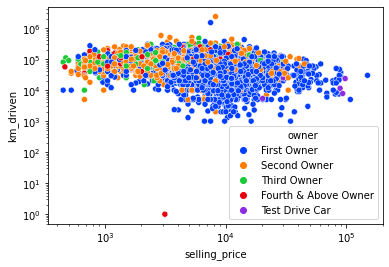

In [195]:
sns.scatterplot(x="selling_price", y="km_driven",data=df, hue="owner", palette="bright")
plt.xscale("log")
plt.yscale("log")

<AxesSubplot:xlabel='seller_type', ylabel='count'>

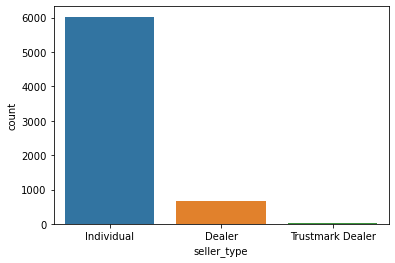

In [196]:
sns.countplot(x="seller_type", data=df)

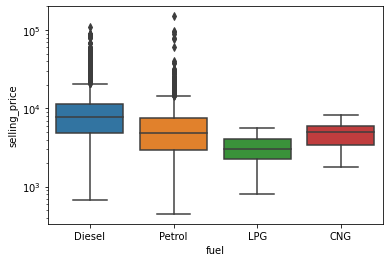

In [197]:
sns.boxplot(x="fuel", y="selling_price", data=df)
plt.yscale("log")

(25.0, 250.0)

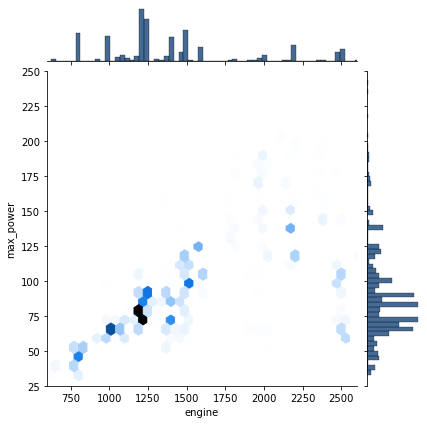

In [198]:
sns.jointplot(x="engine", y="max_power", kind="hex", data=df, color="#063970")
plt.xlim(600,2600)
plt.ylim(25,250)

In [199]:
df[df["owner"]!="Test Drive Car"]["owner"]

0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
8121            Second Owner
8122            Second Owner
8123             First Owner
8124    Fourth & Above Owner
8125             First Owner
Name: owner, Length: 6712, dtype: object

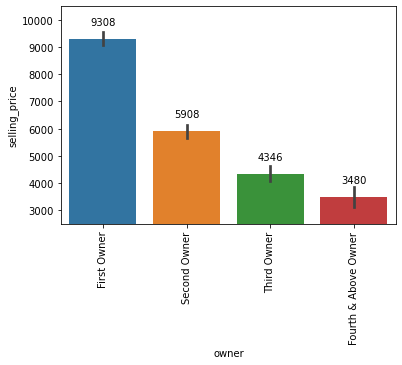

In [200]:
ax = sns.barplot(x=df[df["owner"]!="Test Drive Car"]["owner"], y="selling_price", data=df)
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+500))
plt.ylim(2500,10500);

In [201]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427335,-0.387918,0.366048,-0.019763,0.159889,0.025021
selling_price,0.427335,1.000000,-0.161265,-0.108655,0.442772,0.692323,0.158531
km_driven,-0.387918,-0.161265,1.000000,-0.196419,0.253460,0.041770,0.207890
mileage,0.366048,-0.108655,-0.196419,1.000000,-0.579153,-0.378609,-0.459188
engine,-0.019763,0.442772,0.253460,-0.579153,1.000000,0.683506,0.658711
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.025021,0.158531,0.207890,-0.459188,0.658711,0.259028,1.000000


<AxesSubplot:>

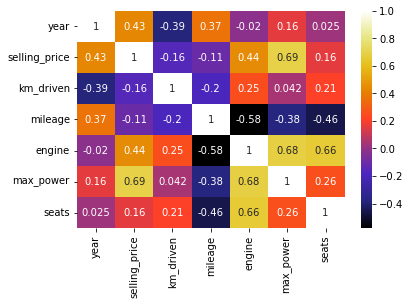

In [202]:
sns.heatmap(df.corr(), annot=True, cmap="CMRmap")

---
## Veriyi Ölçeklemek

In [208]:
df.shape

(6717, 12)

In [205]:
dumdum_df = pd.get_dummies(df.drop("name",axis=1))

In [209]:
dumdum_df.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,6750.0,145500,23.40,1248.0,74.00,5.0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,5550.0,120000,21.14,1498.0,103.52,5.0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,2370.0,140000,17.70,1497.0,78.00,5.0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,3375.0,127000,23.00,1396.0,90.00,5.0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,1950.0,120000,16.10,1298.0,88.20,5.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
scaler = MinMaxScaler()

In [213]:
scaled = scaler.fit_transform(dumdum_df)

In [214]:
scaled

array([[0.76923077, 0.04212648, 0.06164021, ..., 0.        , 0.        ,
        0.        ],
       [0.76923077, 0.0341024 , 0.05083721, ..., 1.        , 0.        ,
        0.        ],
       [0.46153846, 0.01283861, 0.05931015, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.73076923, 0.02908736, 0.04660074, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.01053169, 0.05041356, ..., 0.        , 0.        ,
        0.        ],
       [0.57692308, 0.03530601, 0.05083721, ..., 0.        , 0.        ,
        0.        ]])

In [215]:
df_scale = pd.DataFrame(scaled, columns=dumdum_df.columns)

<AxesSubplot:>

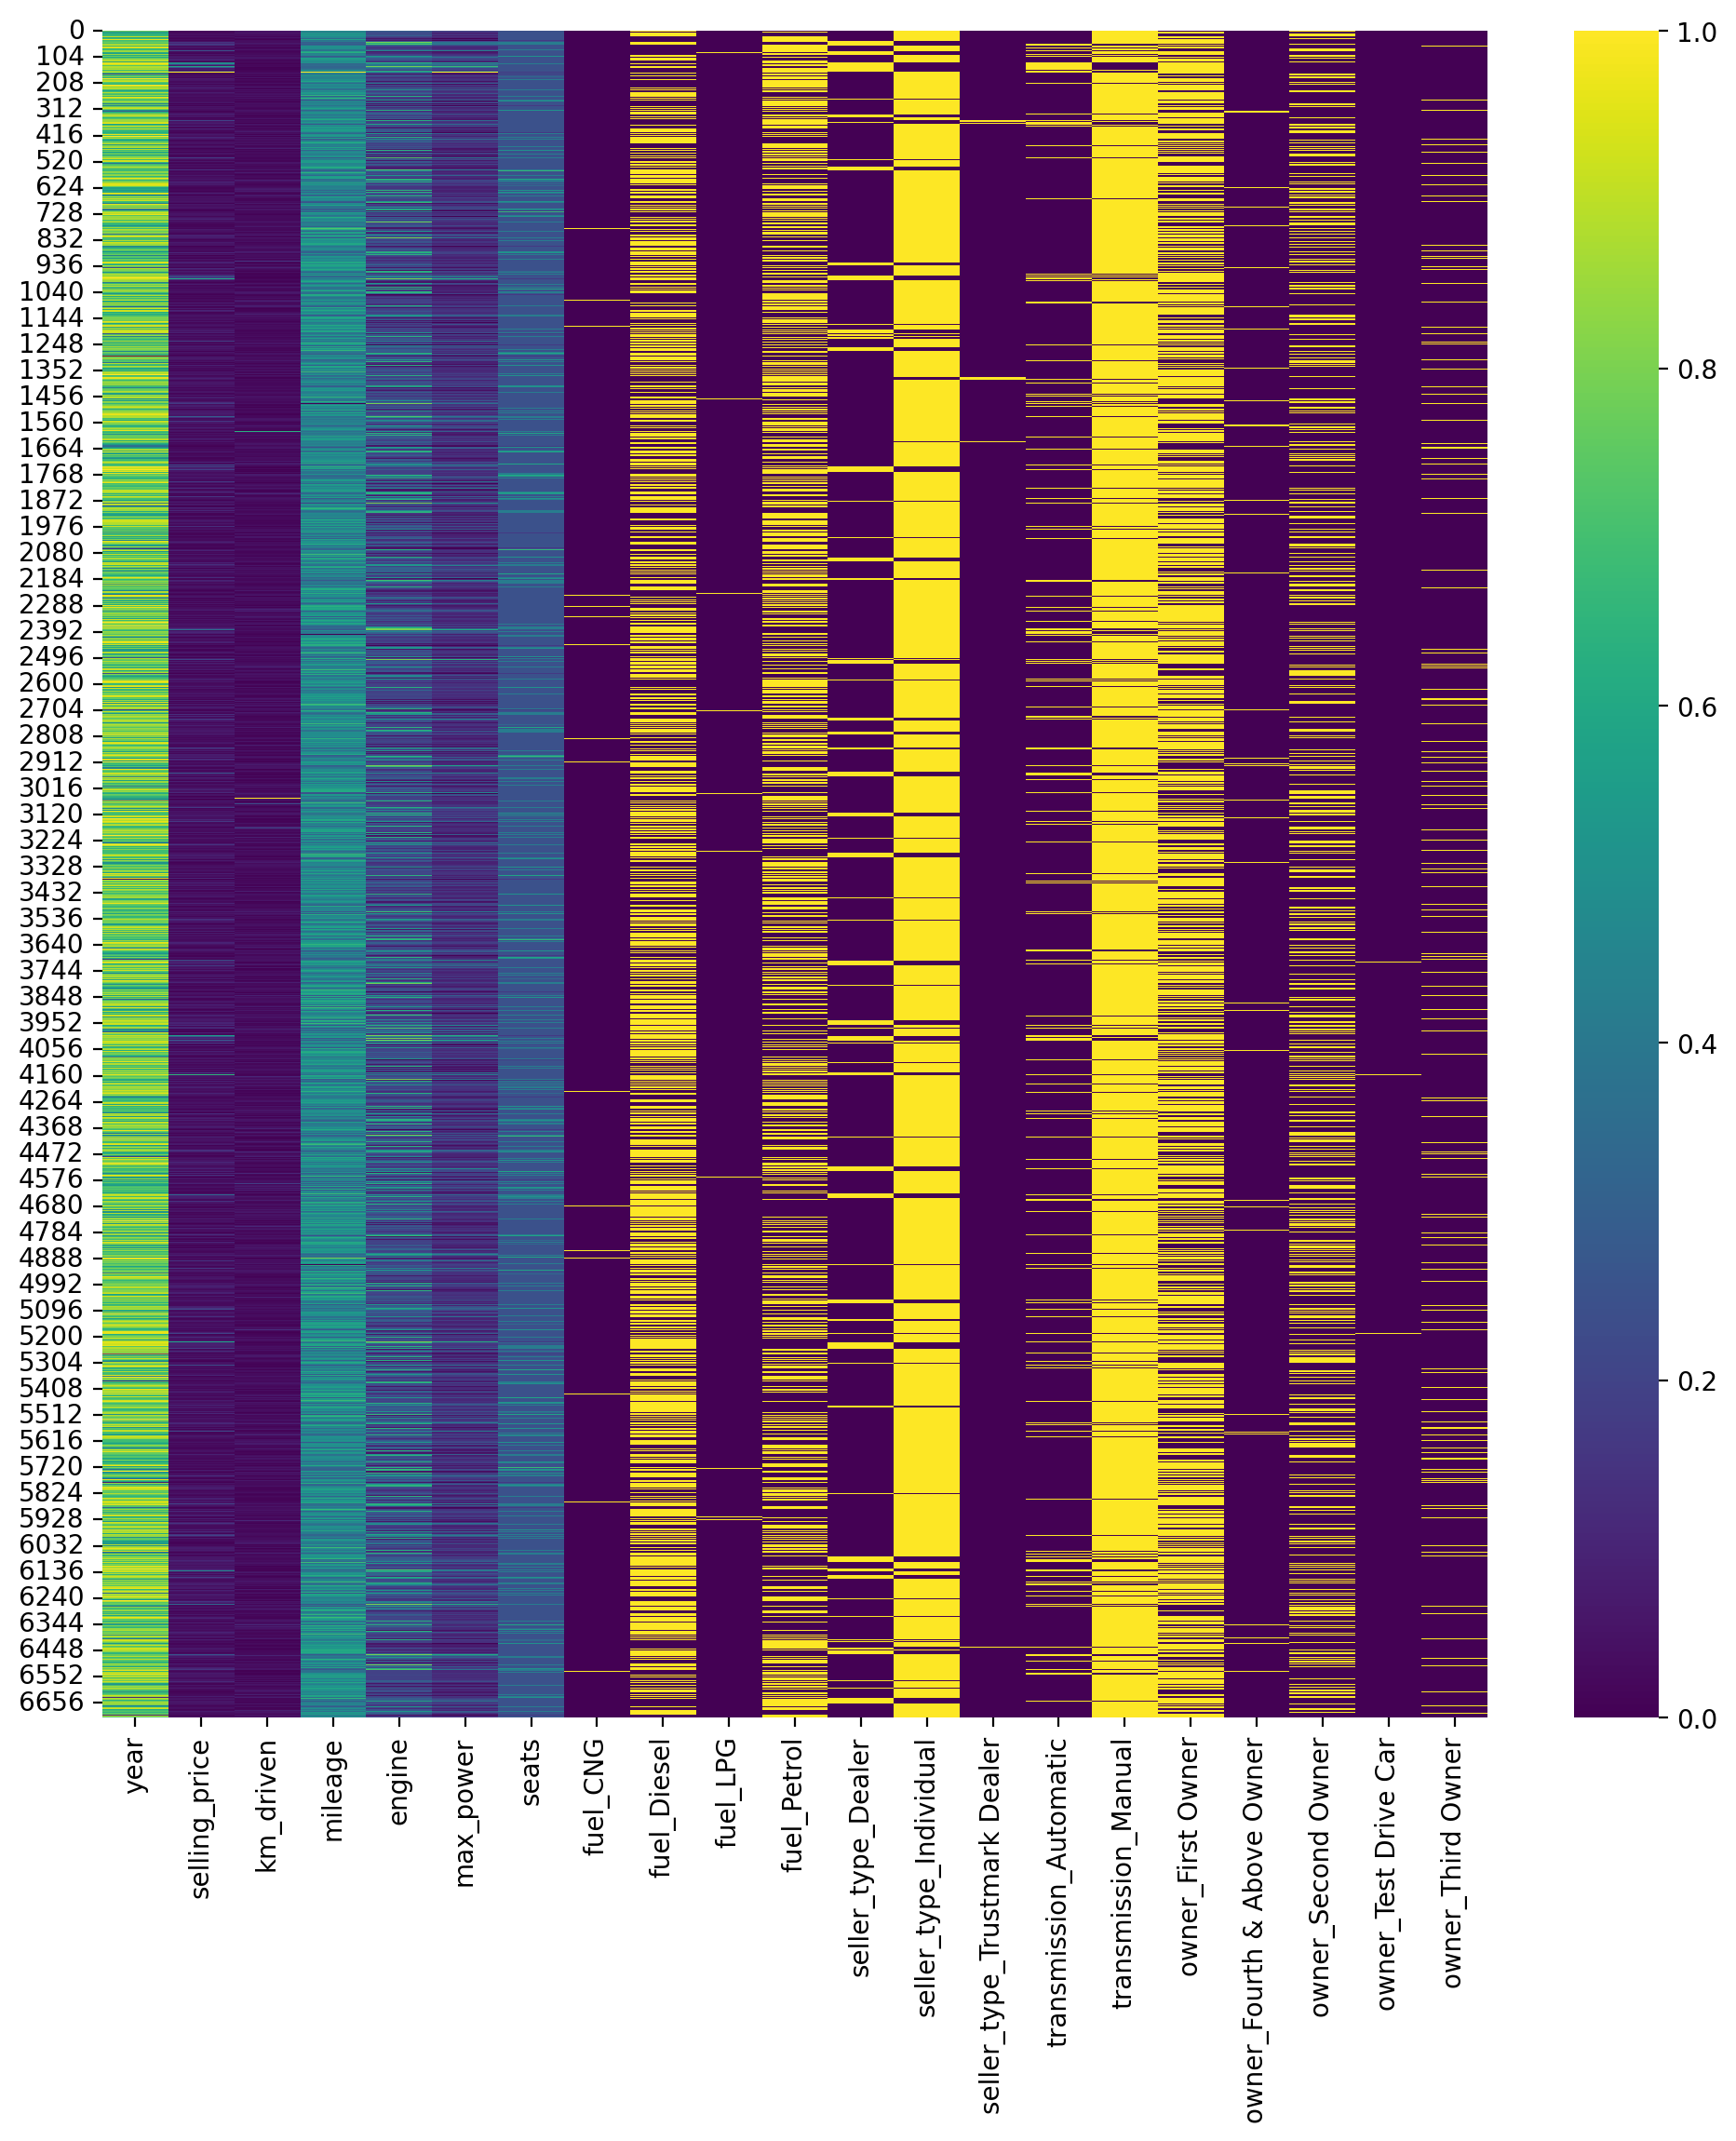

In [228]:
plt.figure(figsize=(12,12), dpi=200)
sns.heatmap(df_scale, cmap="viridis")

c:\Users\mbatu\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


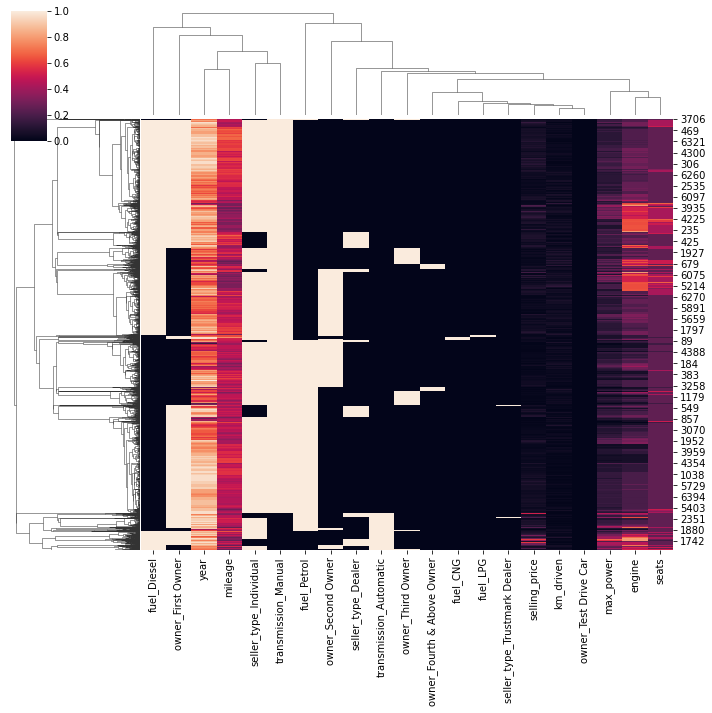

In [229]:
sns.clustermap(df_scale)

c:\Users\mbatu\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


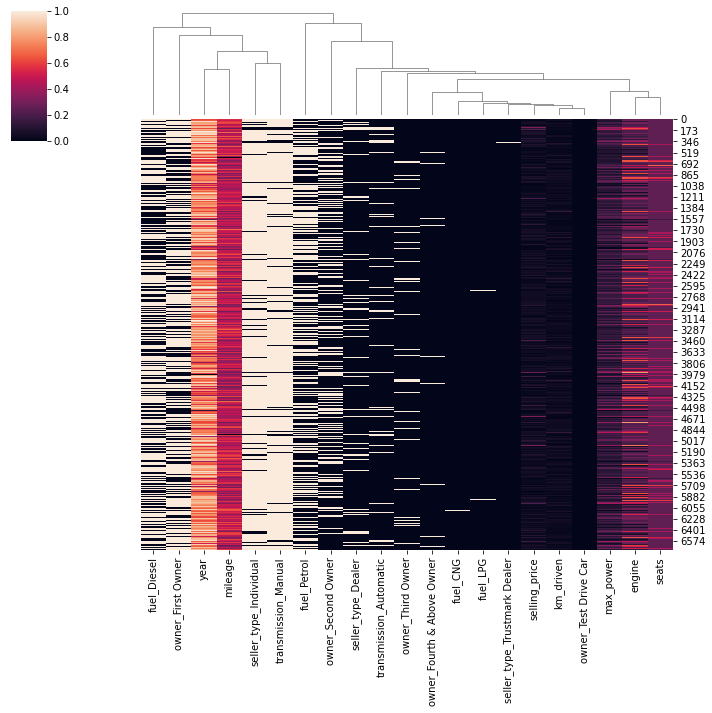

In [230]:
sns.clustermap(df_scale, row_cluster=False)

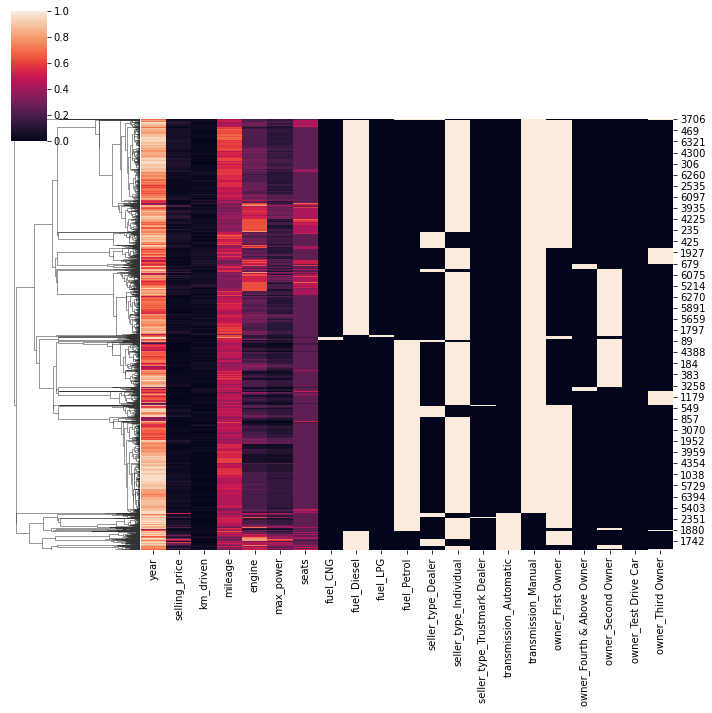

In [236]:
sns.clustermap(df_scale, col_cluster=False)

---
## SK-Learn Cluster

In [237]:
from sklearn.cluster import AgglomerativeClustering

In [242]:
model = AgglomerativeClustering(n_clusters=3)
cluster = model.fit_predict(df_scale)

In [243]:
print(len(cluster))
cluster

6717


array([0, 1, 1, ..., 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='engine', ylabel='max_power'>

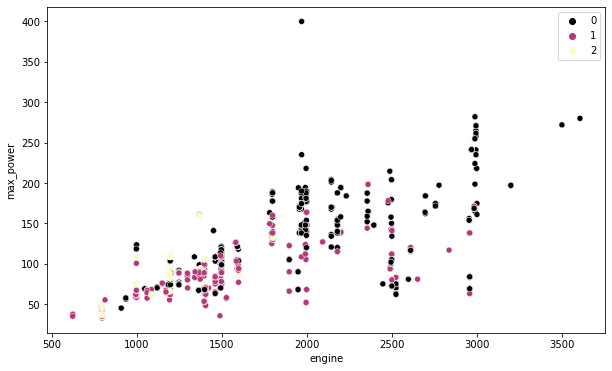

In [252]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="engine", y="max_power", hue=cluster, palette="magma")

### Maks Uzaklık

In [255]:
len(df_scale.columns)

21

In [293]:
np.sqrt(21)
# Teorik maksimum mesafe

4.58257569495584

### distance_threshold = 0

In [257]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [258]:
cluster_0 = model.fit_predict(df_scale)
cluster_0

array([3517, 6315, 6663, ...,    5,    2,    0], dtype=int64)

In [266]:
len(np.unique(cluster_0))

6717

### Uzaklık Sınırı

In [280]:
kume_sayisi = []

for h in range(1,10):
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=h)
    cluster_h = model.fit_predict(df_scale)

    a = len(np.unique(cluster_h))
    kume_sayisi.append(a)

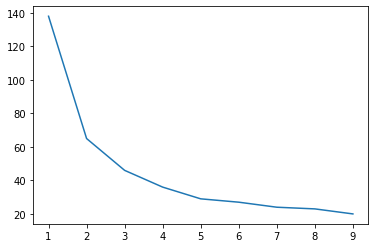

In [281]:
plt.plot(range(1,10), kume_sayisi)

---
## Dendogram

!pip install scipy

In [284]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [285]:
linkage = hierarchy.linkage(model.children_)

In [286]:
linkage

array([[1.33000000e+03, 2.92400000e+03, 1.41421356e+00, 2.00000000e+00],
       [8.15000000e+02, 4.69100000e+03, 2.23606798e+00, 2.00000000e+00],
       [5.65100000e+03, 5.78400000e+03, 2.23606798e+00, 2.00000000e+00],
       ...,
       [6.15400000e+03, 1.34270000e+04, 4.73511352e+02, 6.71400000e+03],
       [6.55400000e+03, 1.34280000e+04, 4.76026260e+02, 6.71500000e+03],
       [6.39400000e+03, 1.34290000e+04, 7.26006198e+02, 6.71600000e+03]])

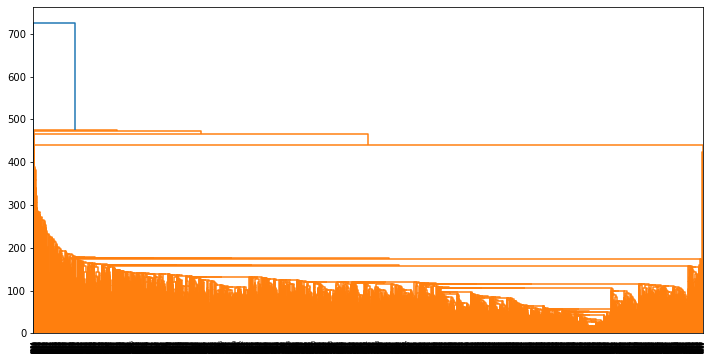

In [287]:
plt.figure(figsize=(12,6))
dendogram = hierarchy.dendrogram(linkage)

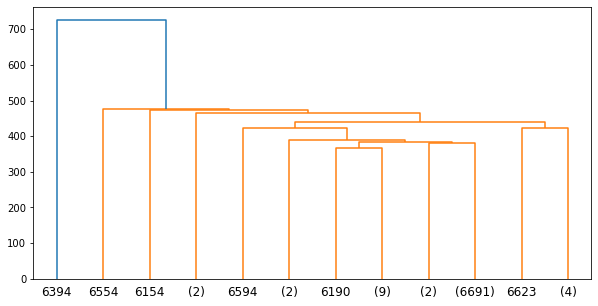

In [291]:
plt.figure(figsize=(10,5))
dendogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=12)

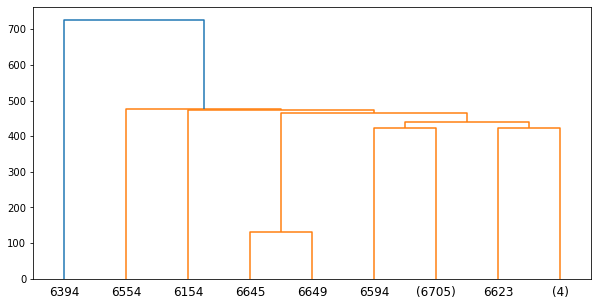

In [292]:
plt.figure(figsize=(10,5))
dendogram = hierarchy.dendrogram(linkage, truncate_mode="level", p=5)

---
## threshold_distance Seçimi

In [289]:
print(df_scale["engine"].idxmax())
print(df_scale["engine"].idxmin())

129
348


In [295]:
df_scale.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,...,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000
mean,0.754274,0.049788,0.031095,0.463490,0.270801,0.149690,0.286189,0.007593,0.544588,0.005211,...,0.099151,0.896829,0.004020,0.085604,0.914396,0.621706,0.023076,0.281078,0.000744,0.073396
std,0.149900,0.052513,0.024869,0.096383,0.165594,0.086396,0.081984,0.086811,0.498045,0.072002,...,0.298887,0.304205,0.063278,0.279799,0.279799,0.484998,0.150155,0.449559,0.027275,0.260805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.653846,0.022066,0.016098,0.400000,0.192282,0.093410,0.250000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.769231,0.039117,0.028894,0.462857,0.209396,0.133524,0.250000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.884615,0.062187,0.042364,0.535714,0.293289,0.183007,0.250000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [290]:
max = df_scale.iloc[129]
min = df_scale.iloc[348]
fark = np.linalg.norm(max-min)
fark
# Gerçek maksimum mesafe

2.405670403072852

---
## İdeal(?) Kümeleme Yöntemi

In [296]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2.3)

In [297]:
clusters = model.fit_predict(df_scale)

In [298]:
clusters

array([17,  9,  5, ..., 11, 24, 32], dtype=int64)

In [299]:
len(np.unique(clusters))

57

In [300]:
linkage = hierarchy.linkage(model.children_)

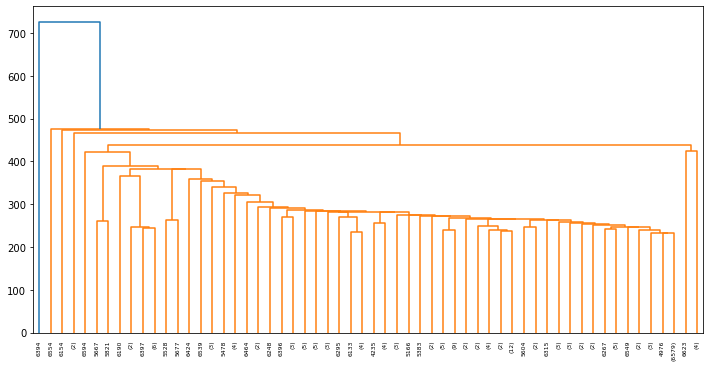

In [305]:
plt.figure(figsize=(12,6))
dendogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=58)

---
# **https://www.youtube.com/watch?v=hKtU55AGiDY**